In [36]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

random.seed(42)

In [37]:
# Reading the dataset
data = pd.read_csv('/fashion_data.csv')

In [38]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:400].T
Y_dev = data_dev[-1]
X_dev = data_dev[0:n-1]
X_dev = X_dev / 255.

data_train = data[400:m].T
Y_train = data_train[-1]
X_train = data_train[0:n-1]
X_train = X_train / 255.
_,m_train = X_train.shape

In [39]:
Y_train

array([8, 5, 2, ..., 0, 2, 2])

In [40]:
X_dev.shape

(784, 400)

In [41]:
X_train.shape

(784, 1600)

In [42]:
print(m,n)

2000 785


Part 1: Building your own neural network

In [43]:
# define a global variable specifying the number of hidden neurons after the first layer
num_hidden_neurons = 20

In [44]:
# Initialize the parameters in the neural network

# W1, b1 are the matrices for the first layer
# W2, b2 are the matrices for the second layer

def init_params():
    W1 = np.random.rand(num_hidden_neurons, X_train.shape[0]) - 0.5
    b1 = np.random.rand(num_hidden_neurons, 1) - 0.5
    W2 = np.random.rand(10, num_hidden_neurons) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [45]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [46]:
# In the forward propagation function, X is the input (the image in vector form), and we pass all the weights and biases

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [47]:
# one hot function to convert a numeric number into a one-hot vector
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# performing the backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# update the parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [48]:
# Implement the helper function. We need to convert the softmax output into a numeric label
# This is done through get_predictions function
def get_predictions(A2):
    return np.argmax(A2, axis=0)

# We also want to have a simple function to compute the accuracy
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# implement gradient descent
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [49]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
0.101875
Iteration:  10
0.38
Iteration:  20
0.49625
Iteration:  30
0.56125
Iteration:  40
0.59625
Iteration:  50
0.624375
Iteration:  60
0.65375
Iteration:  70
0.675
Iteration:  80
0.685
Iteration:  90
0.69625
Iteration:  100
0.7075
Iteration:  110
0.7125
Iteration:  120
0.719375
Iteration:  130
0.724375
Iteration:  140
0.730625
Iteration:  150
0.733125
Iteration:  160
0.738125
Iteration:  170
0.74375
Iteration:  180
0.748125
Iteration:  190
0.75375
Iteration:  200
0.750625
Iteration:  210
0.75125
Iteration:  220
0.75
Iteration:  230
0.7575
Iteration:  240
0.763125
Iteration:  250
0.76875
Iteration:  260
0.77125
Iteration:  270
0.77625
Iteration:  280
0.77875
Iteration:  290
0.78
Iteration:  300
0.785
Iteration:  310
0.78625
Iteration:  320
0.78875
Iteration:  330
0.795
Iteration:  340
0.796875
Iteration:  350
0.79875
Iteration:  360
0.801875
Iteration:  370
0.805625
Iteration:  380
0.808125
Iteration:  390
0.81
Iteration:  400
0.81125
Iteration:  410
0.8125
Iteration:  4

In [50]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [51]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.745

Prediction:  [8]
Label:  8


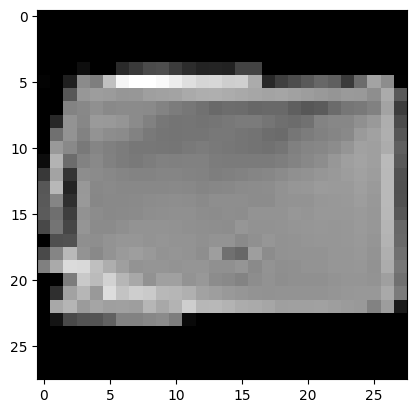

Prediction:  [5]
Label:  5


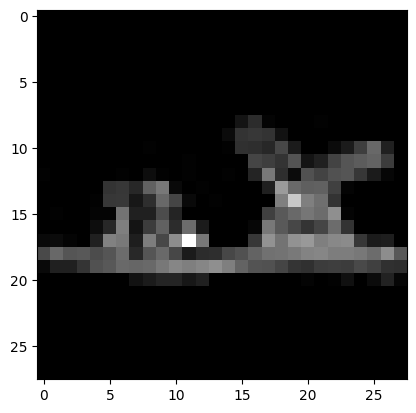

Prediction:  [2]
Label:  2


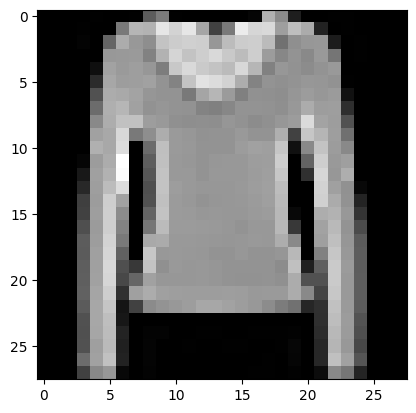

Prediction:  [0]
Label:  0


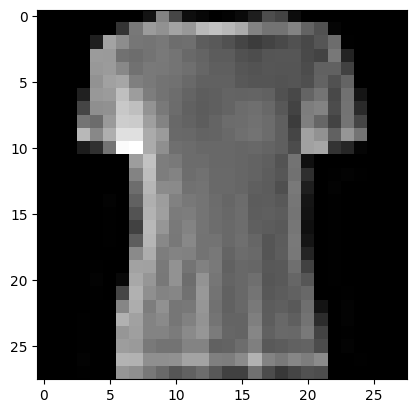

In [52]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(50, W1, b1, W2, b2)

Part 2: Error Analysis and Performance Improvements

In [53]:
# Model 1 - Leaky ReLU

def LeakyReLU(Z, alpha=0.01):
    return np.where(Z > 0, Z, Z * alpha)

def LeakyReLU_deriv(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)

# Update forward_prop to use LeakyReLU
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = LeakyReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

While Leaky ReLU is similar to ReLU, but instead of returning zero for negative inputs, it returns a small negative value. This prevents neurons from dying during training.

In [54]:
# Model 2 - Learning Rate

# Train with a smaller learning rate
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.01, 500)

# Train with a larger learning rate
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.5, 500)

Iteration:  0
0.10375
Iteration:  10
0.145
Iteration:  20
0.17875
Iteration:  30
0.20875
Iteration:  40
0.243125
Iteration:  50
0.27125
Iteration:  60
0.300625
Iteration:  70
0.319375
Iteration:  80
0.343125
Iteration:  90
0.3675
Iteration:  100
0.4
Iteration:  110
0.425625
Iteration:  120
0.439375
Iteration:  130
0.454375
Iteration:  140
0.47
Iteration:  150
0.484375
Iteration:  160
0.496875
Iteration:  170
0.50375
Iteration:  180
0.515625
Iteration:  190
0.525
Iteration:  200
0.533125
Iteration:  210
0.53625
Iteration:  220
0.54375
Iteration:  230
0.549375
Iteration:  240
0.55875
Iteration:  250
0.565
Iteration:  260
0.569375
Iteration:  270
0.573125
Iteration:  280
0.576875
Iteration:  290
0.5825
Iteration:  300
0.5875
Iteration:  310
0.59375
Iteration:  320
0.594375
Iteration:  330
0.59875
Iteration:  340
0.600625
Iteration:  350
0.603125
Iteration:  360
0.60625
Iteration:  370
0.609375
Iteration:  380
0.613125
Iteration:  390
0.61625
Iteration:  400
0.619375
Iteration:  410
0.6206

The learning rate impacts how quicly a model adapts to a problem. A high learning rate can cause the model to converge too quicly while a learning rate that's too low can result in slow learning or inability to learn


In [55]:
# Model 3 - L2 Regularization

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, lambda_reg=0.01):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T) + (lambda_reg / m) * W2
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T) + (lambda_reg / m) * W1
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

L2 Regularization reduces overfitting, which improves generalization. This is done by reducing the weights to be small but not making them 0.